![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




### Carga y lectura del dataset

In [1]:
# Carga de librerías
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import os

In [2]:
# Leer el dataset
df= pd.read_excel('../Dataset/BBDD_Hospitalización.xlsx')
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

C:\Users\Cristian\AppData\Roaming\Python\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(570, 20)

### Observamos vacios o nulos del dataset

In [3]:
# Nulos por fila, se hizo para observar registros vacios completamente, en este caso se eliminan los regostros 569 y 568
df.isnull().sum(axis=1).sort_values(ascending = False) 

569    20
568    20
565     3
566     2
115     1
       ..
200     0
199     0
198     0
197     0
285     0
Length: 570, dtype: int64

In [4]:
df = df.drop(df.index[-2:]) # Eliminar dos ultimos registros

In [5]:
# Nulos por columna, de be hacer un análisis para imputar o eliminar datos vacios o faltantes
df.isna().sum().sort_values(ascending = False) 

AGENTE AISLADO                                                               17
PSA                                                                           4
HOSPITALIZACION                                                               3
BIOPSIAS PREVIAS                                                              2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
VOLUMEN PROSTATICO                                                            1
CUP                                                                           1
EDAD                                                                          0
ITU                                                                           0
DIAS HOSPITALIZACION MQ                                                       0
PATRON DE RESISTENCIA                                                         0
TIPO DE CULTIVO                                                               0
BIOPSIA                                 

### EDA para variables categóricas y numéricas
Se observa gráficamente las variables categóricas para determinar que columnas serán relevantes para el modelo de ML

In [6]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols =2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

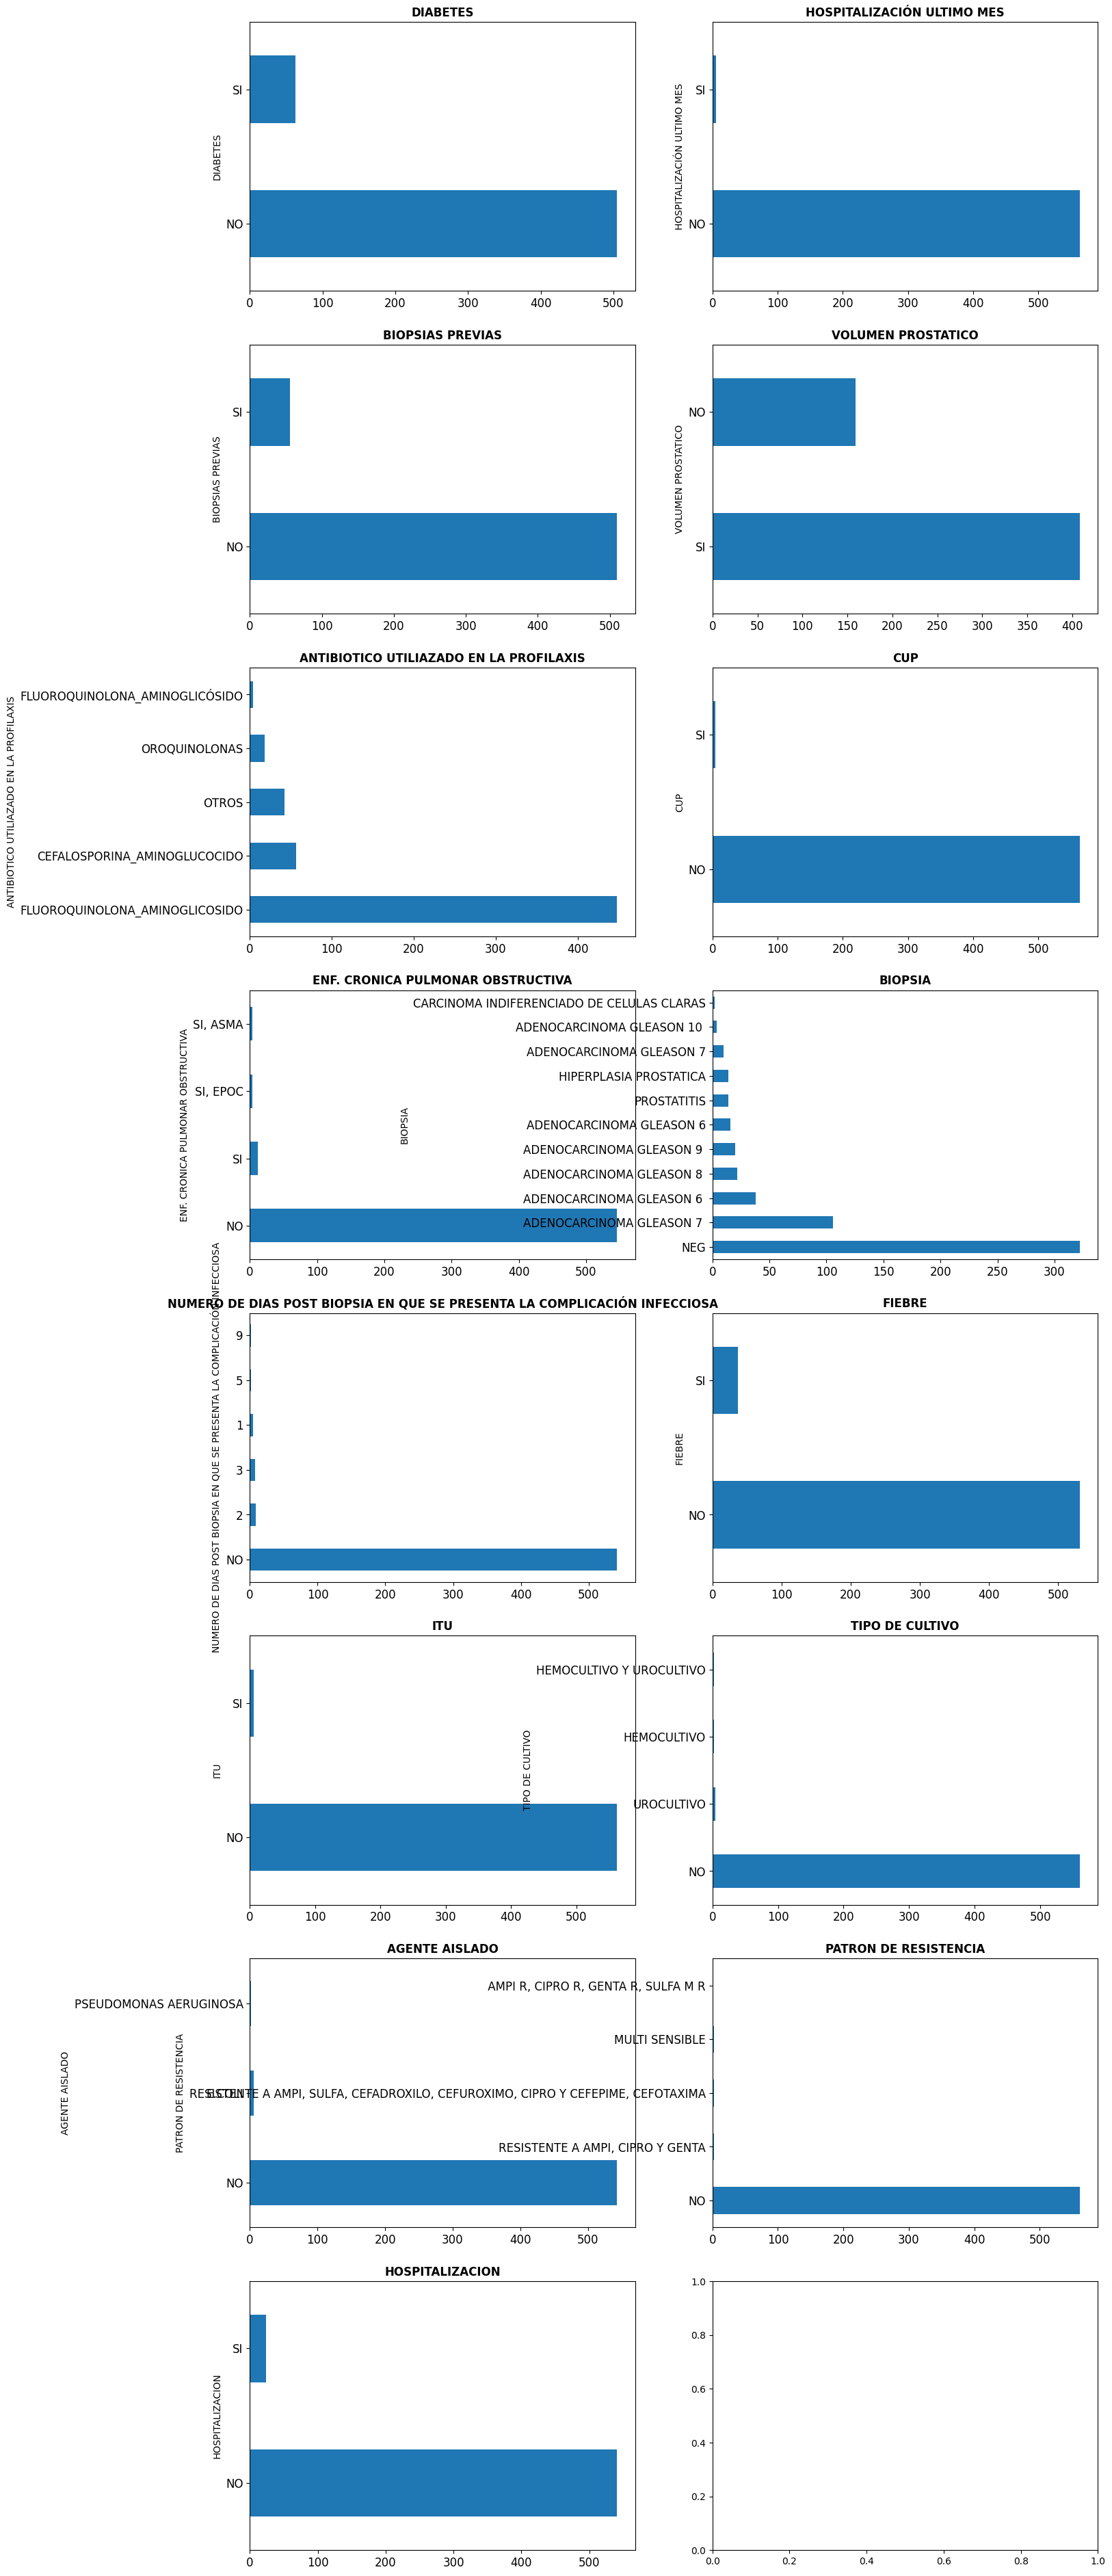

In [7]:
graficos_eda_categoricos(df.select_dtypes('O'))

In [8]:
df.select_dtypes('O').isna().sum().sort_values(ascending = False)

AGENTE AISLADO                                                               17
HOSPITALIZACION                                                               3
BIOPSIAS PREVIAS                                                              2
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
VOLUMEN PROSTATICO                                                            1
CUP                                                                           1
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                                                        0
ITU                                     

Conclusiones:

En la siguiente tabla se observan la respectivas imputaciones basados en el número de nulos y gráficos de barras anteriores,
donde se imputan los valores faltantes por el dato más frecuente y se eliminan columnas que la mayoría de su registros es el mismo valor  


| Variable                                        | Imputación/Eliminación           | Cantidad nulos|
|-------------------------------------------------|----------------------------------|:-------------:|
| HOSPITALIZACION                                 | Imputación por NO                | 5             |
| BIOPSIAS PREVIAS                                | Imputación por NO                | 4             |
| VOLUMEN PROSTATICO                              | Imputación por NO                | 3             |
| DIABETES                                        | Imputación por NO                | 2             |
| FIEBRE                                          | Imputación por NO                | 2             |
| ANTIBIOTICO UTILIZADO EN LA PROFILAXIS          | Imputación por Fluor             | 2             |
| BIOPSIA                                         | Imputación por Neg               | 2             |
| CUP                                             | Eliminación                      | 3             |
| ENF. CRONICA PULMONAR OBSTRUCTIVA               | Eliminación                      | 4             |
| NUM DE DIAS POST BIOPSIA SE PRESENTA LA COMPLIC INFECCIOSA | Eliminación           | 2             |
| HOSPITALIZACIÓN ULTIMO MES                      | Eliminación                      | 2             |
| ITU                                             | Eliminación                      | 2             |
| AGENTE AISLADO                                  | Eliminación                      | 19            |
| TIPO DE CULTIVO                                 | Eliminación                      | 2             |
| PATRON DE RESISTENCIA                           | Eliminación                      | 2             |


In [9]:
# Se eliminan las columnas y aplican las correspondientes imputaciones
df.drop(columns =   [ 'CUP', 
                    'ENF. CRONICA PULMONAR OBSTRUCTIVA', 
                    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 
                    'HOSPITALIZACIÓN ULTIMO MES', 
                    'ITU', 
                    'AGENTE AISLADO', 
                    'TIPO DE CULTIVO', 
                    'PATRON DE RESISTENCIA'
                    ], inplace = True)

df['HOSPITALIZACION'] = df['HOSPITALIZACION'].fillna('NO')

df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].fillna('NO')

df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].fillna('NO')

df['DIABETES'] = df['DIABETES'].fillna('NO')

df['FIEBRE'] = df['FIEBRE'].fillna('NO')

df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].fillna('FLUOROQUINOLONA_AMINOGLICOSIDO')

df['BIOPSIA'] = df['BIOPSIA'].fillna('Neg')

In [10]:
df.select_dtypes('O').isna().sum().sort_values(ascending = False) # Verificamos los cambios

DIABETES                                   0
BIOPSIAS PREVIAS                           0
VOLUMEN PROSTATICO                         0
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS    0
BIOPSIA                                    0
FIEBRE                                     0
HOSPITALIZACION                            0
dtype: int64

Ahora analizamos, las variables numéricas con un resumen de estadísticos

In [11]:
df.select_dtypes('number').isna().sum().sort_values(ascending = False)

PSA                           4
EDAD                          0
NUMERO DE MUESTRAS TOMADAS    0
DIAS HOSPITALIZACION MQ       0
DIAS HOSPITALIZACIÓN UPC      0
dtype: int64

In [12]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
EDAD,568.0,63.882042,64.0,9.281517,39.0,59.0,64.0,69.0,151.0
PSA,564.0,13.271401,8.0,15.668966,0.6,5.6,8.0,15.0,100.0
NUMERO DE MUESTRAS TOMADAS,568.0,12.996479,12.0,3.921180,4.0,12.0,12.0,12.0,24.0
DIAS HOSPITALIZACION MQ,568.0,0.165493,0.0,0.958066,0.0,0.0,0.0,0.0,12.0
DIAS HOSPITALIZACIÓN UPC,568.0,0.014085,0.0,0.196474,0.0,0.0,0.0,0.0,3.0


Conclusiones:
* DIAS HOSPITALIZACION MQ -> Eliminar la columna debido a que la mayoría de sus datos pertenecen a un solo valor
* DIAS HOSPITALIZACIÓN UPC -> Eliminar la columna debido a que la mayoría de sus datos pertenecen a un solo valor
* NUMERO DE MUESTRAS TOMADAS -> Eliminar la columna debido a que la mayoría de sus datos pertenecen a un solo valor
* PSA -> Imputar por la media para los valores nulos

In [14]:
# Eliminación de columnas numéricas
df.drop(columns =   ['DIAS HOSPITALIZACION MQ', 
                     'DIAS HOSPITALIZACIÓN UPC',
                     'NUMERO DE MUESTRAS TOMADAS'
                    ], inplace = True)

In [15]:
# Manejo de datos faltantes
 # Importar el módulo necesario para la imputación datos faltantes (En este caso SimpleImputer de Scikit-Learn)
from sklearn.impute import SimpleImputer
# Crear una instancia de SimpleImputer con una estrategia para reemplazar los valores faltantes con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  
# Se indica las columnas numéricas a las que le realizará la imputación (PSA)
imputer.fit(df[['PSA']]) 
# Transformar y reemplazar los valores faltantes en las columnas especificadas con la media
df['PSA'] = imputer.transform(df[['PSA']]) 

In [16]:
# Verifícamos nulos nuevamente
df.select_dtypes('number').isna().sum().sort_values(ascending = False) 

EDAD    0
PSA     0
dtype: int64

### Revisión de outliers y distribución de los datos

<function matplotlib.pyplot.show(close=None, block=None)>

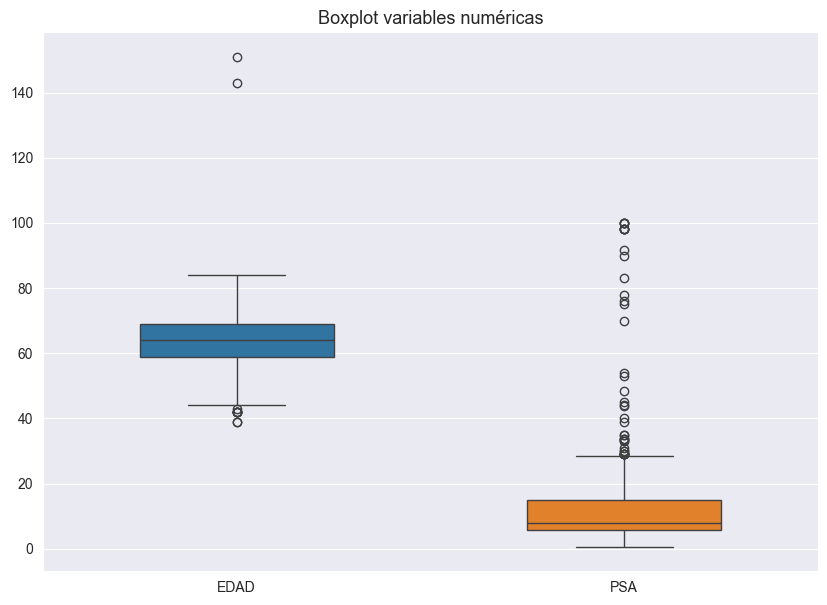

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
sns.boxplot(data=df.select_dtypes('number'), width=0.5)
plt.title('Boxplot variables numéricas', fontsize = 13)
plt.show

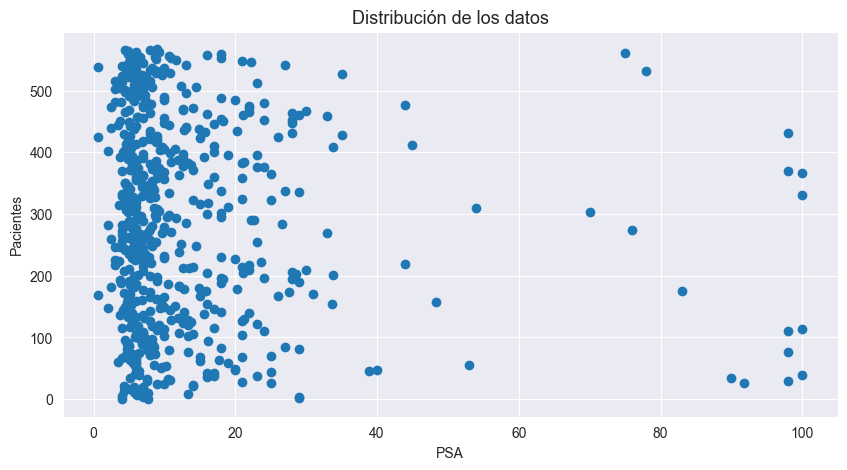

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(df['PSA'],df.index)
plt.title('Distribución de los datos', fontsize = 13)
plt.xlabel('PSA')
plt.ylabel('Pacientes')
plt.show()

Conclusiones:

* Se observa que la variable EDAD, contiene dos outliers que pueden ser imputados por promedio de todos los registros, para evitar eliminarlos
* En cuanto a la variable PSA, se observa que hay caso en que se pueden obtener resultados altos, aunque no se encuentren dentro de los valores medios

In [38]:
# Elimino los dos registros outoliers
df.loc[df['EDAD'] > 140, 'EDAD'] = np.nan
from sklearn.impute import SimpleImputer
# Crear una instancia de SimpleImputer con una estrategia para reemplazar los valores faltantes con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  
# Se indica las columnas numéricas a las que le realizará la imputación (EDAD)
imputer.fit(df[['EDAD']]) 
# Transformar y reemplazar los valores faltantes en las columnas especificadas con la media
df['EDAD'] = imputer.transform(df[['EDAD']]) 

<function matplotlib.pyplot.show(close=None, block=None)>

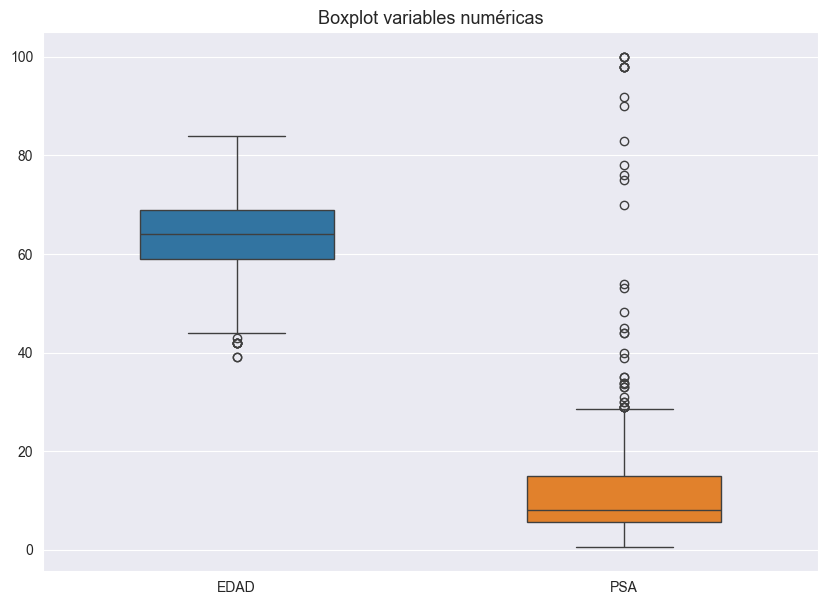

In [39]:
# Verificamos nuevamente outliers
sns.set_style("darkgrid")
plt.figure(figsize = (10,7))
sns.boxplot(data=df.select_dtypes('number'), width=0.5)
plt.title('Boxplot variables numéricas', fontsize = 13)
plt.show

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 